In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
file_path = r"C:\Users\Nitro 5\OneDrive\Desktop\Data Analyst\Data Science\datasets\housing.csv"

In [6]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# __Missing Data Analysis__

In [32]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Mising Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Mising Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [23]:
# Remove rows with missing values
data_cleaned = data.dropna()

In [31]:
data_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
# Verify that missing values have been removed
print("Missing values in each column after removal: \n")
print(data_cleaned.isnull().sum())

Missing values in each column after removal: 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# __Data Exploration and Visualization__

In [36]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\Nitro 5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


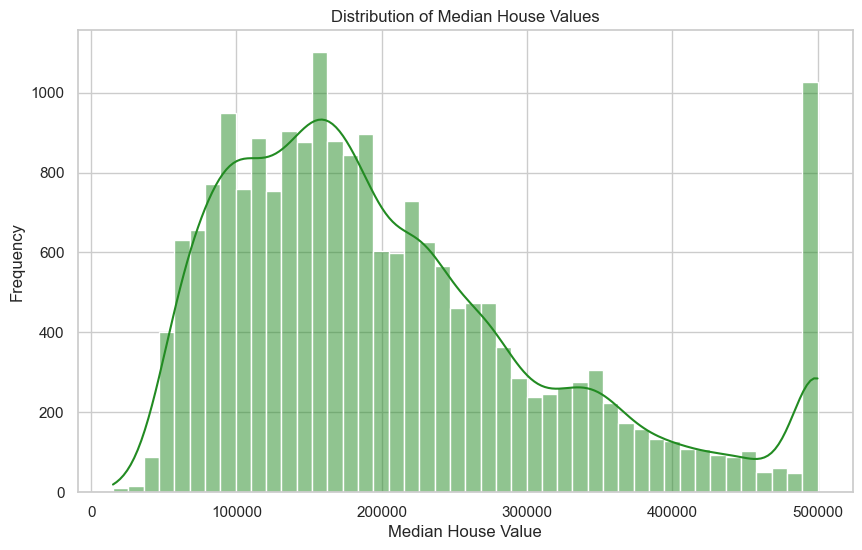

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# __Using InterQuartile Range to Remove Outliers__

In [41]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


# __BoxPlot for Outlier Detection__

## Outliers in Median Income

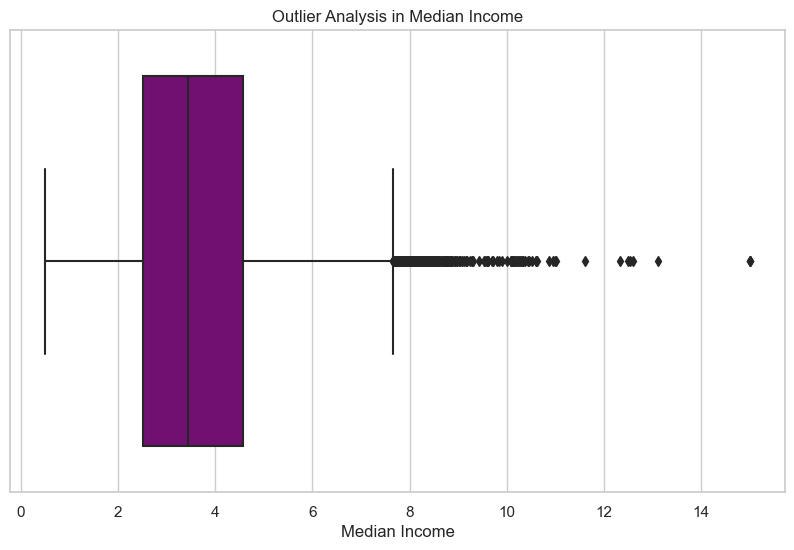

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [46]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [91]:
data = data_no_outliers_2
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Correlation HeatMap

In [80]:
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.923414           -0.098777     0.044601   
latitude            -0.923414  1.000000            0.000835    -0.032106   
housing_median_age  -0.098777  0.000835            1.000000    -0.372855   
total_rooms          0.044601 -0.032106           -0.372855     1.000000   
total_bedrooms       0.070703 -0.068830           -0.332087     0.937055   
population           0.103325 -0.115763           -0.297250     0.859684   
households           0.057811 -0.074669           -0.313695     0.923629   
median_income       -0.015126 -0.076082           -0.183205     0.234480   
median_house_value  -0.049612 -0.151486            0.086226     0.137017   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070703    0.103325    0.057811      -0.015126   
latitude                 -0.068830   -0.115763   -0.074669      -0.076082   
housing_

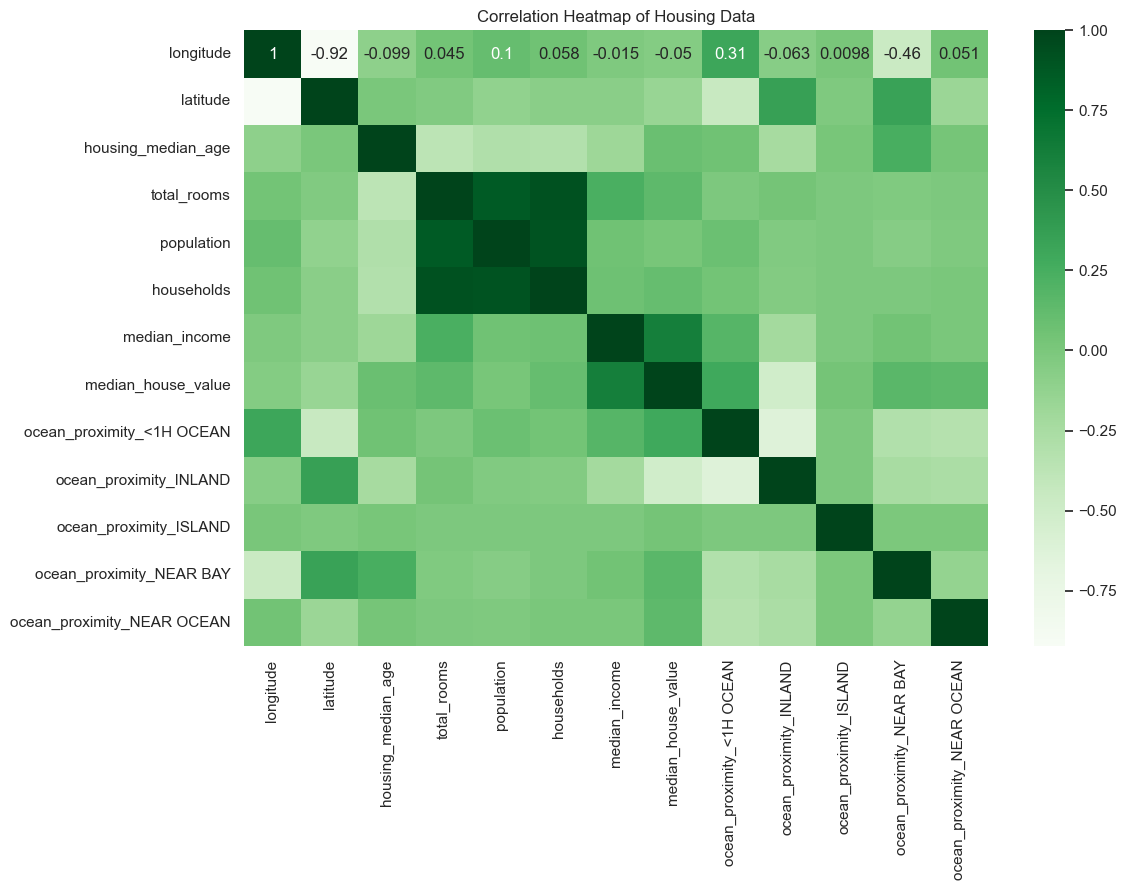

In [109]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [102]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

KeyError: "['total_bedrooms'] not found in axis"

In [100]:
# Unique value count for categorical data
for column in ['ocean_proximity']: # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

KeyError: 'ocean_proximity'

## String Data Categorization to Dummy Variables

In [101]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies


KeyError: 'ocean_proximity'

In [105]:
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [110]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [112]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)

In [113]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,False,False,True,False
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,False,False,True,False


## Splitting the Data into Train & Test

In [115]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

x = data[features]
y = data[target]

# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {x_train.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


## Training

In [171]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
x_train_const = sm.add_constant(x_train)
x_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,True,False,False,False
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,False,True,False,False
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,True,False,False,False
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,False,True,False,False
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,True,False,False,False
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,False,True,False,False
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,False,True,False,False
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,False,True,False,False


In [158]:
x_train_const = x_train_const.apply(pd.to_numeric, errors='coerce')

In [175]:
x_train_const['ocean_proximity_<1H OCEAN'] = pd.to_numeric(x_train_const['ocean_proximity_<1H OCEAN'], errors='coerce')  # Convert to numeric, coercing errors to NaN
x_train_const['ocean_proximity_<1H OCEAN'] = x_train_const['ocean_proximity_<1H OCEAN'].astype('int64')  # Convert to a specific type
x_train_const['ocean_proximity_INLAND'] = pd.to_numeric(x_train_const['ocean_proximity_INLAND'], errors='coerce')  # Convert to numeric, coercing errors to NaN
x_train_const['ocean_proximity_INLAND'] = x_train_const['ocean_proximity_INLAND'].astype('int64')  # Convert to a specific type
x_train_const['ocean_proximity_NEAR BAY'] = pd.to_numeric(x_train_const['ocean_proximity_NEAR BAY'], errors='coerce')  # Convert to numeric, coercing errors to NaN
x_train_const['ocean_proximity_NEAR BAY'] = x_train_const['ocean_proximity_NEAR BAY'].astype('int64')  # Convert to a specific type
x_train_const['ocean_proximity_NEAR OCEAN'] = pd.to_numeric(x_train_const['ocean_proximity_NEAR OCEAN'], errors='coerce')  # Convert to numeric, coercing errors to NaN
x_train_const['ocean_proximity_NEAR OCEAN'] = x_train_const['ocean_proximity_NEAR OCEAN'].astype('int64')  # Convert to a specific type

In [176]:
print(x_train_const.dtypes)
print(x_train_const.head())

const                         float64
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object
       const  longitude  latitude  housing_median_age  total_rooms  \
15578    1.0    -116.90     33.03                11.0       3213.0   
1656     1.0    -121.93     37.89                13.0       2085.0   
9190     1.0    -118.35     34.32                52.0        102.0   
11839    1.0    -120.95     39.93                26.0       2023.0   
12267    1.0    -116.91     33.75                13.0      10886.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
15578      1975.0       579.0     

In [177]:
x_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [178]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, x_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        16:30:12   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prediction/Testing

In [181]:
# Adding a constant to the test predictors
x_test_const = sm.add_constant(x_test)

# Makin predictions on the test set
test_predictions = model_fitted.predict(x_test_const)

In [187]:
test_predictions

7322      153414.20188
465       239312.04418
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: object

# __Checking OLS Assumptions__

## Assumption 1: Linearity

<function matplotlib.pyplot.show(close=None, block=None)>

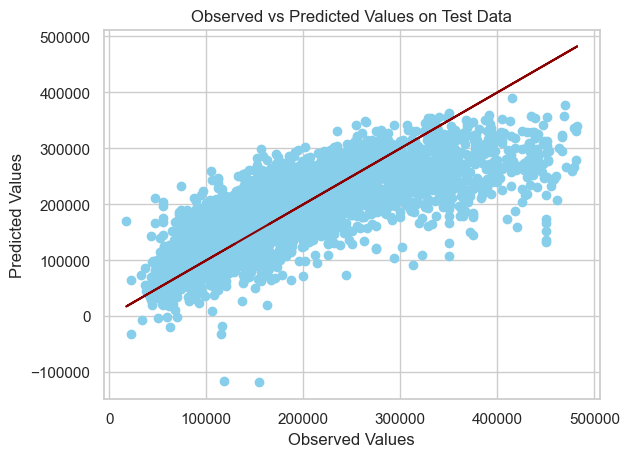

In [186]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "skyblue")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # line for perfect prediction (true values)
plt.show

##### __Positive Linear Relationship:__ The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as actual values increase, the predicted values also increase, which is a good sign for linearity.

## Assumption 2: Random Sample

In [191]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residual is {np.round(mean_residuals, 2)}")

The mean of the residual is -0.0


##### While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

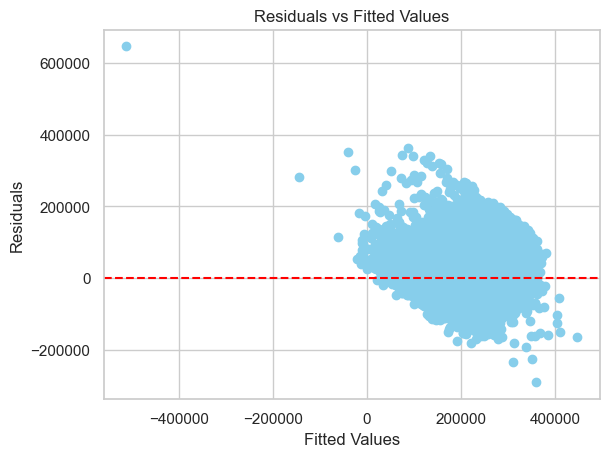

In [192]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "skyblue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

##### In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

## Assumption 3: Exogeneity

In [193]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in x_train.columns:
    corr_coefficient = np.corrcoef(x_train[column], residuals)[0,1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


##### __Durbin-Wu-Hausman Test:__ For a more formal statistical test, use the __Durbin-Wu-Hausman Test__. This involves comparing your model with one that includes an instrumental variable. This test checks whethter the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.

## Assumption 4: Homoskedasticity

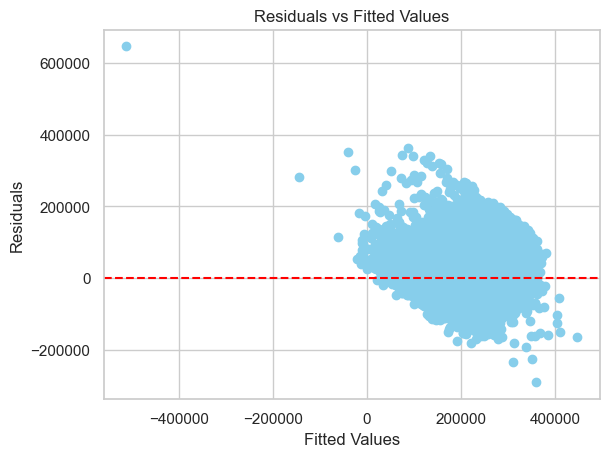

In [194]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "skyblue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

##### __Random Scatter:__ If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.
##### __Pattern or Shape:__ If residuals display a pattern (such as curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedicity, meaning variance of residuals changes with the level of the independent variables.

# Train/Test/Evaluation with Sklearn

## Scaling the Data

In [195]:
from sklearn.preprocessing import StandardScaler
# Initiatilze the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Apply the same transformation to the test data
x_test_scaled = scaler.transform(x_test)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(x_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

#Output the performance metrics
print(f'MSE on Test Set: {mse}')
print(f'RMSE on Test Set: {rmse}')

MSE on Test Set: 3529059611.5734305
RMSE on Test Set: 59405.88869441674
